In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as ppt
from scipy import signal
from sklearn.preprocessing import StandardScaler

In [8]:
data = pd.read_csv(r"C:\Users\akhil\Downloads\My PC (DESKTOP-1SSKE7P)\Downloads\cycle.csv")
births1 = data.iloc[0:139,1].values
births2 = data.iloc[139:,1].values
years1 = data.iloc[0:139,0].values
years2 = data.iloc[139:,0].values
years = data.iloc[:,0].values
print(births2)

[23.7 23.3 22.4 21.7 21.1 19.5 18.4 17.8 17.6 17.9 18.4 17.2 15.6 14.8
 14.8 14.6 14.6 15.1 15.  15.6 15.9 15.8 15.9 15.6 15.6 15.8 15.6 15.7
 16.  16.4 16.7 16.2 15.8 15.4 15.  14.6 14.4 14.2 14.3 14.2 14.4 14.1
 13.9 14.1 14.  14.  14.3 14.3 14.  13.5 13.  12.7 12.6 12.4 12.5 12.4
 12.2 11.8 11.6 11.4 11.  11.  11. ]


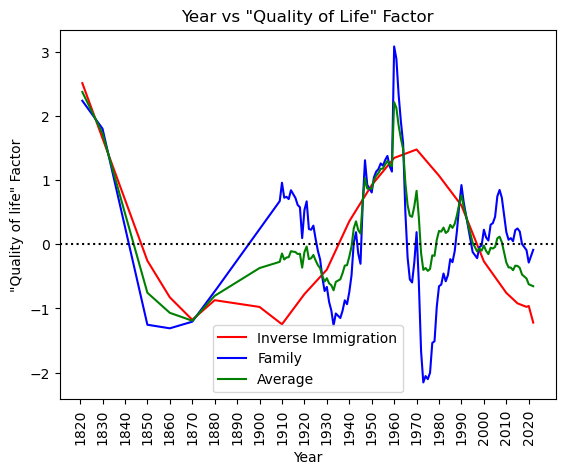

In [9]:
scaler=StandardScaler()
births_det=signal.detrend(births1)
births_det1=signal.detrend(births2)
fb1 = scaler.fit_transform(np.stack((births_det,years1),axis=1))
fb2 = scaler.fit_transform(np.stack((births_det1,years2),axis=1))
ind = np.append(fb1[:,0],fb2[:,0],axis=0)
ppt.figure()
idet = data.iloc[:,2]
yo = np.stack((years,idet),axis=1)
oy = scaler.fit_transform(yo)
idet = oy[:,1]
total = (idet+ind)/2
ppt.plot(years,idet,color="red")
ppt.plot(years,ind,color="blue")
ppt.plot(years,total,color="green")
ppt.title("Year vs \"Quality of Life\" Factor")
ppt.xlabel("Year")
ppt.ylabel("\"Quality of life\" Factor")
ppt.axhline(y=0,color="black",linestyle="dotted")
ppt.xticks(np.arange(1820,2025,10),rotation="vertical")
ppt.legend(['Inverse Immigration','Family','Average'])

([<matplotlib.axis.XTick at 0x2504bbe3e20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

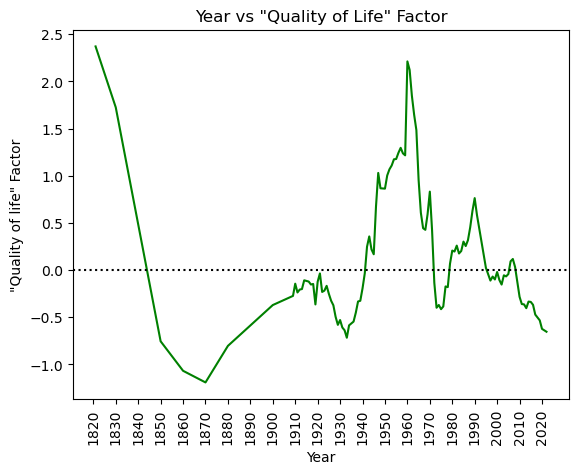

In [10]:
ppt.plot(years,total,color="green")
ppt.title("Year vs \"Quality of Life\" Factor")
ppt.xlabel("Year")
ppt.ylabel("\"Quality of life\" Factor")
ppt.axhline(y=0,color="black",linestyle="dotted")
ppt.xticks(np.arange(1820,2021,10),rotation="vertical")

In [11]:
print(total[-1]) # number in 2022
print(total[40]) #number in 1861
print(total[112]) # number in 1933
print(total[152]) #number in 1973
print(total[-13])#number in 2010
print(total[-11])

-0.6548163280153674
-1.0812997872125567
-0.7184554676555527
-0.4003698879161427
-0.28448749603913204
-0.3647249039806854


In [12]:
print(total[169]) # number in 1990
print(total[139]) # number in 1960
print(total[100]) # number in 1921

0.7620516764426433
2.2116480455127467
-0.036278886816934974
